# Foxd2: Only the controls were used for the overall analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
gene = 'Foxd2'

In [3]:
manual = pd.read_csv(gene + '_manual_annotation.csv')
pd.set_option('display.max_columns', None)
manual

,mouse_id,strain,sex,genotype,type,bw,EF_manual,FS_manual,LVIDd_manual,LVIDs_manual
0,30504924,C57BL/6N,f,control,wt (Foxd2),23.0,89.23,57.70,2.53,1.11
1,30504935,C57BL/6N,f,control,wt (Foxd2),26.2,90.93,60.87,3.07,1.25


In [4]:
filtered_data = pd.read_csv(gene + '_data_filtered_plus_functional_parameter_plus_manual_measurements.csv')
filtered_data

,mouse_id,file,LVIDd_auto,LVIDd_auto_time,LVIDs_auto,LVIDs_auto_time,heart_rate_auto,heart_rate_auto_time,LVIDd_auto_quality_label,LVIDd_auto_quality_flag,LVIDs_auto_quality_label,LVIDs_auto_quality_flag,LV_Vold_auto,LV_Vols_auto,EF_auto,FS_auto,strain,sex,genotype,type,bw,EF_manual,FS_manual,LVIDd_manual,LVIDs_manual,dif_LVIDd,mean_LVIDd,dif_LVIDs,mean_LVIDs,dif_EF,dif_FS
0,30504924,Foxd2_5v5_59.dcm,2.633721,1.141667,0.819767,1.093333,705.882353,1.141667,0.716587,high,0.716587,high,25.404940,1.197693,95.285590,68.874172,C57BL/6N,f,control,wt (Foxd2),23.0,89.23,57.70,2.53,1.11,0.103721,2.581860,-0.290233,0.964884,6.055590,11.174172
1,30504924,Foxd2_5v5_59.dcm,2.686047,1.226667,0.994186,1.175000,757.894737,1.226667,0.716587,high,0.716587,high,26.672167,2.026588,92.401864,62.987013,C57BL/6N,f,control,wt (Foxd2),23.0,89.23,57.70,2.53,1.11,0.156047,2.608023,-0.115814,1.052093,3.171864,5.287013
2,30504924,Foxd2_5v5_59.dcm,2.284884,2.242500,0.767442,2.199167,660.550459,2.242500,0.837308,high,0.837308,high,17.823440,0.998909,94.395533,66.412214,C57BL/6N,f,control,wt (Foxd2),23.0,89.23,57.70,2.53,1.11,-0.245116,2.407442,-0.342558,0.938721,5.165533,8.712214
3,30504924,Foxd2_5v5_59.dcm,2.459302,2.333333,0.750000,2.278333,727.272727,2.333333,0.837308,high,0.837308,high,21.426927,0.937500,95.624664,69.503546,C57BL/6N,f,control,wt (Foxd2),23.0,89.23,57.70,2.53,1.11,-0.070698,2.494651,-0.360000,0.930000,6.394664,11.803546
4,30504924,Foxd2_5v5_59.dcm,2.947674,3.368333,1.395349,3.242500,679.245283,3.368333,0.767331,high,0.767331,high,33.525219,5.010658,85.054064,52.662722,C57BL/6N,f,control,wt (Foxd2),23.0,89.23,57.70,2.53,1.11,0.417674,2.738837,0.285349,1.252674,-4.175936,-5.037278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,30504935,Foxd2_5v5_28.dcm,2.808140,4.203333,1.220930,4.120833,521.739130,4.203333,0.999956,high,0.999956,high,29.762642,3.518442,88.178327,56.521739,C57BL/6N,f,control,wt (Foxd2),26.2,90.93,60.87,3.07,1.25,-0.261860,2.939070,-0.029070,1.235465,-2.751673,-4.348261
187,30504935,Foxd2_5v5_28.dcm,3.156977,4.318333,0.889535,4.237500,500.000000,4.318333,0.999980,high,0.999956,high,39.634521,1.497795,96.220983,71.823204,C57BL/6N,f,control,wt (Foxd2),26.2,90.93,60.87,3.07,1.25,0.086977,3.113488,-0.360465,1.069767,5.290983,10.953204
188,30504935,Foxd2_5v5_28.dcm,3.087209,4.438333,1.377907,4.361667,525.547445,4.438333,0.999980,high,0.999980,high,37.535719,4.847373,87.085971,55.367232,C57BL/6N,f,control,wt (Foxd2),26.2,90.93,60.87,3.07,1.25,0.017209,3.078605,0.127907,1.313953,-3.844029,-5.502768
189,30504935,Foxd2_5v5_28.dcm,2.808140,4.552500,1.046512,4.484167,585.365854,4.552500,0.997326,high,0.999980,high,29.762642,2.327826,92.178699,62.732919,C57BL/6N,f,control,wt (Foxd2),26.2,90.93,60.87,3.07,1.25,-0.261860,2.939070,-0.203488,1.148256,1.248699,1.862919


In [5]:
mice_manual = np.unique(manual['mouse_id'])
mice_automatic = np.unique(filtered_data['mouse_id'])
mice_manual==mice_automatic

array([ True,  True])

## Differences between automatic and manual measurements

In [6]:
sns.set_style("whitegrid")
colors1="Spectral"
colors2="tab:red"

### Overview per line

<AxesSubplot:xlabel='mouse_id', ylabel='LVIDs_manual'>

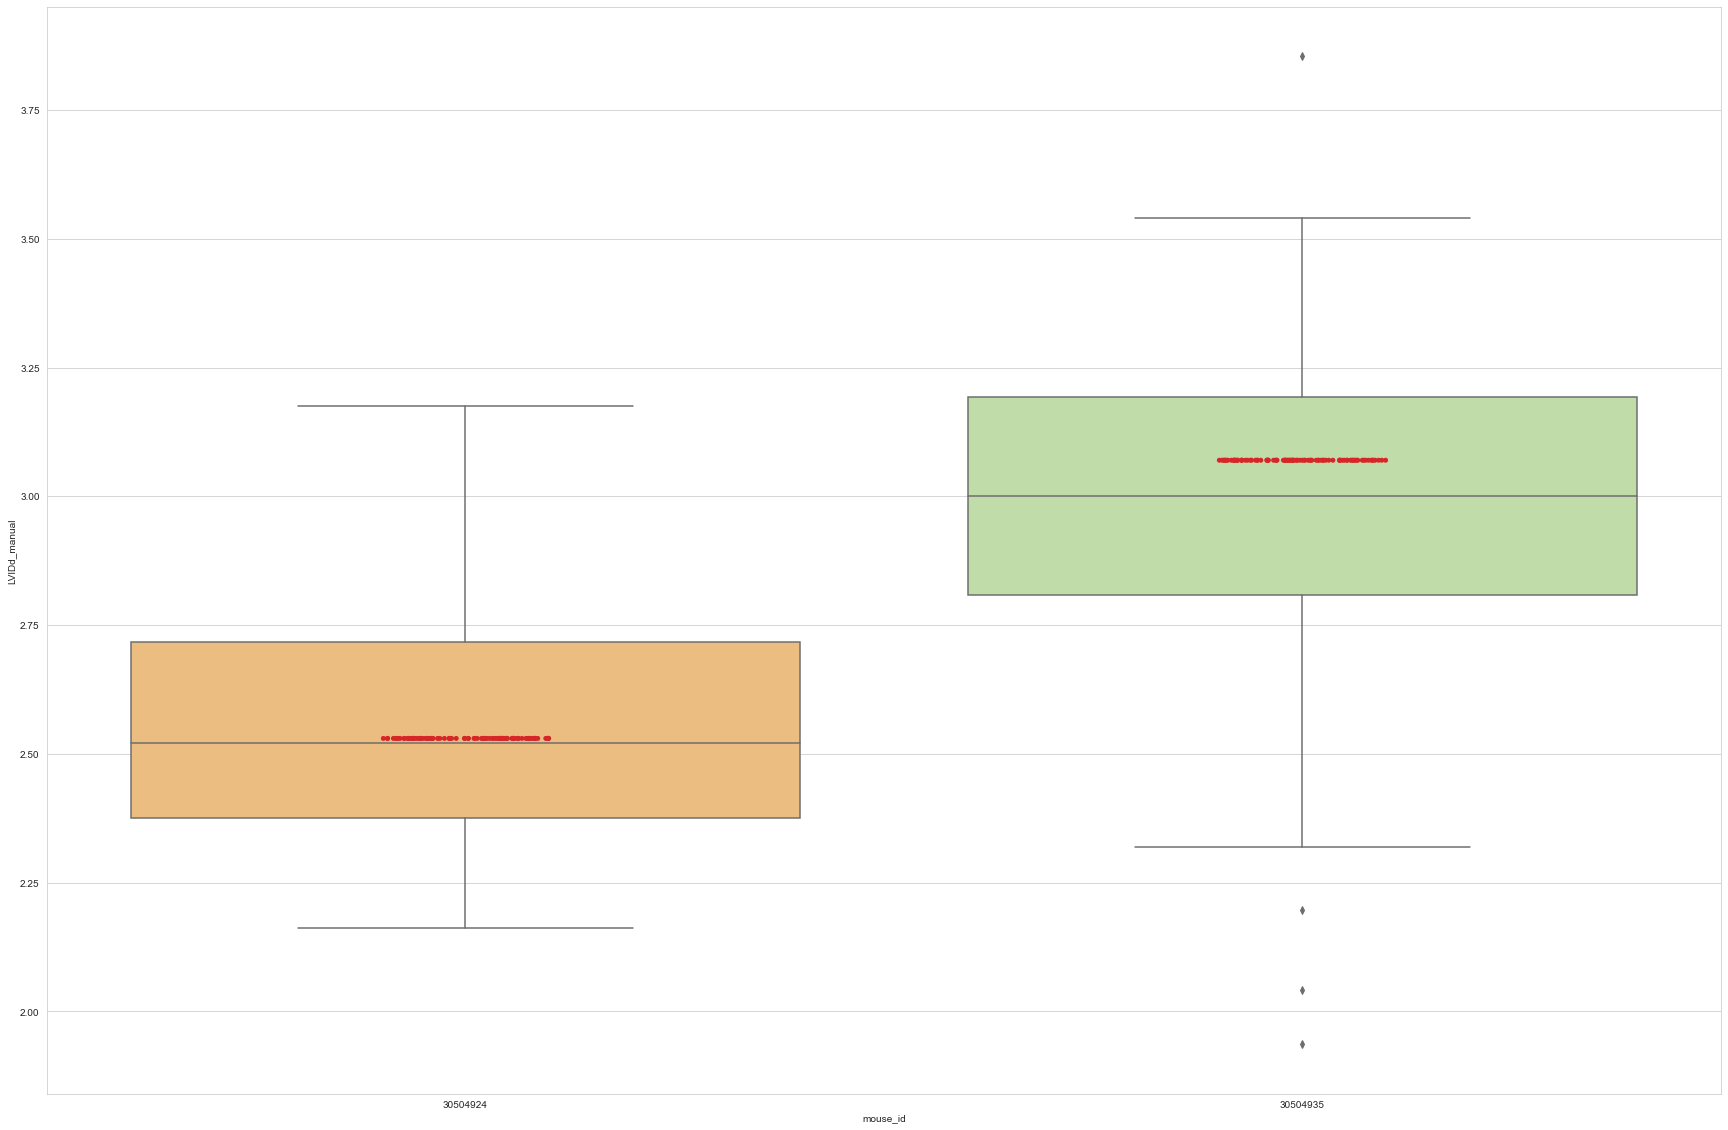

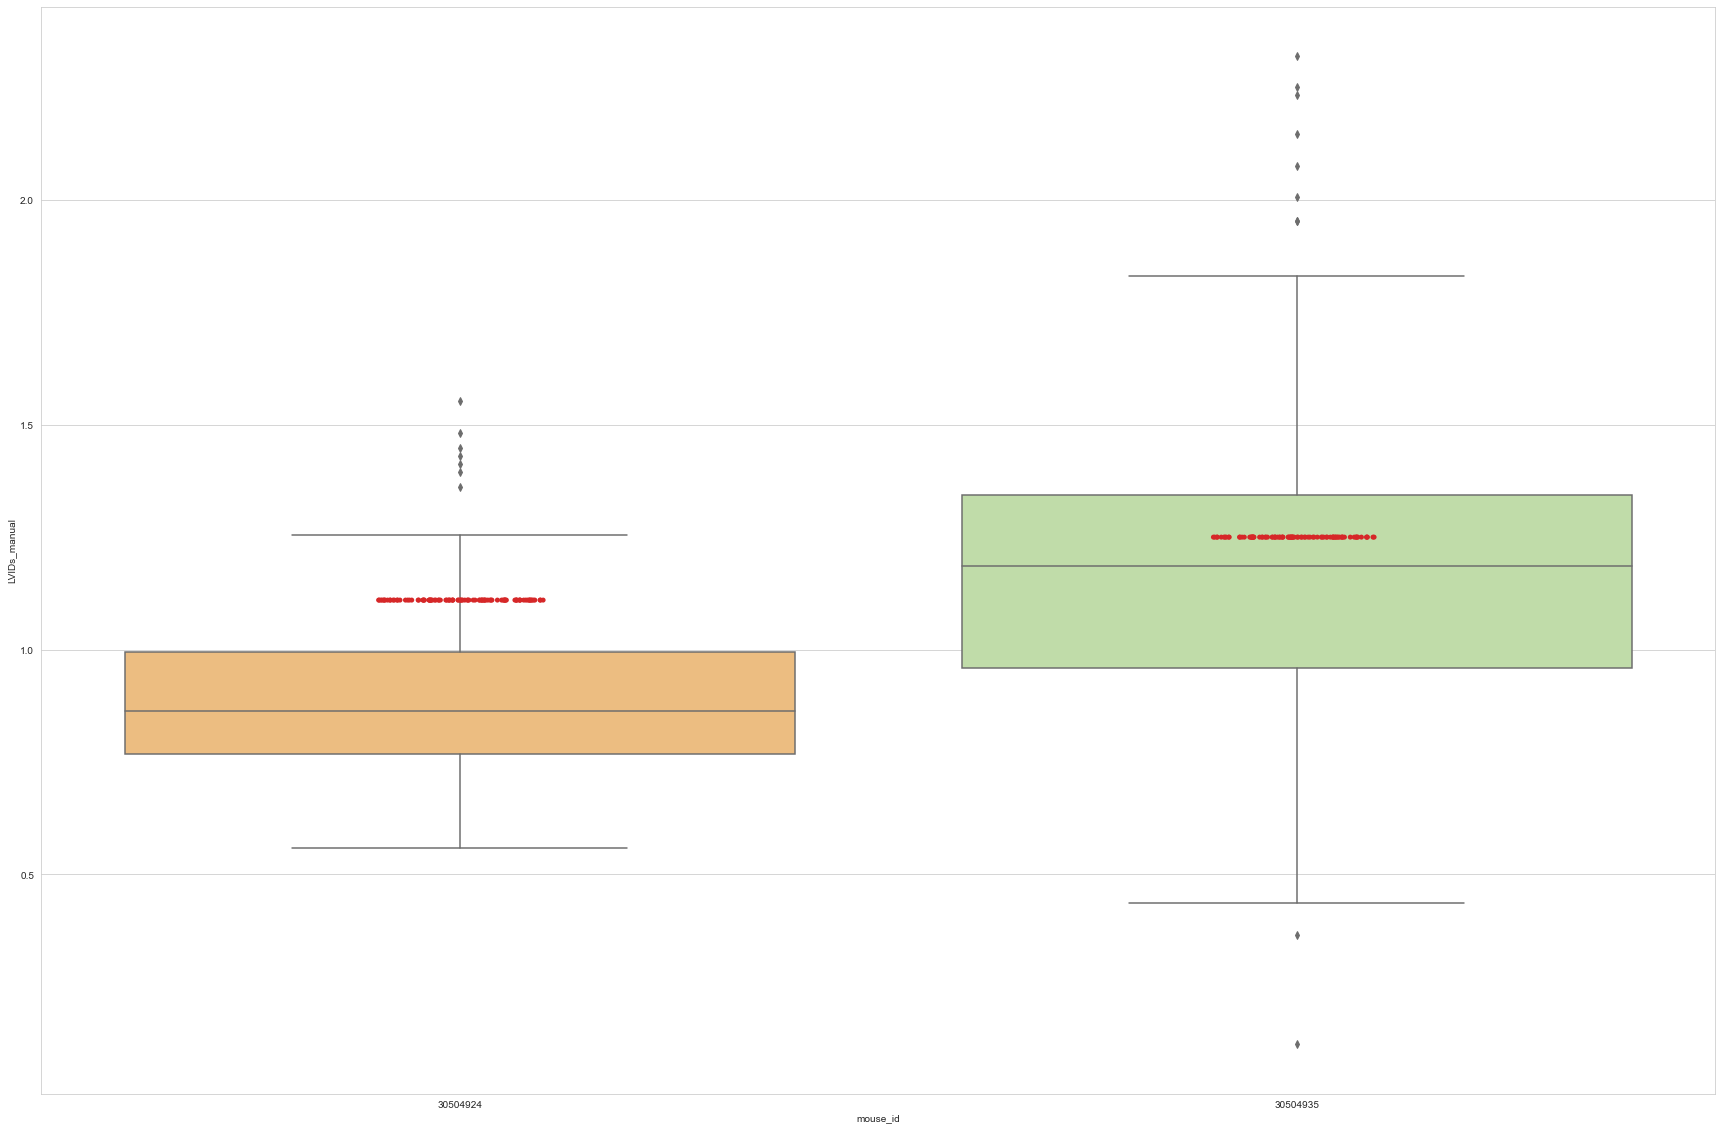

In [7]:
fig = plt.subplots(figsize= (30,20))
sns.boxplot(data=filtered_data,  x="mouse_id", y="LVIDd_auto", palette=colors1)
sns.stripplot(data= filtered_data, x = "mouse_id", y = "LVIDd_manual", color=colors2)

fig = plt.subplots(figsize= (30,20))
sns.boxplot(data=filtered_data,  x="mouse_id", y="LVIDs_auto", palette=colors1)
sns.stripplot(data= filtered_data, x = "mouse_id", y = "LVIDs_manual", color=colors2)

### Overview per mouse per parameter

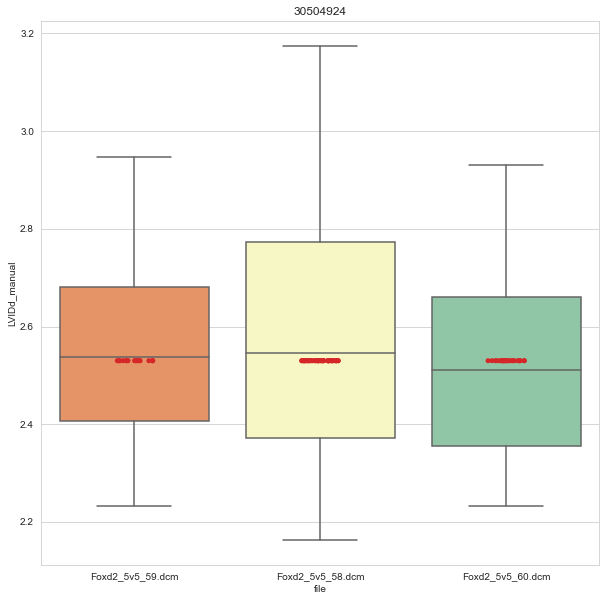

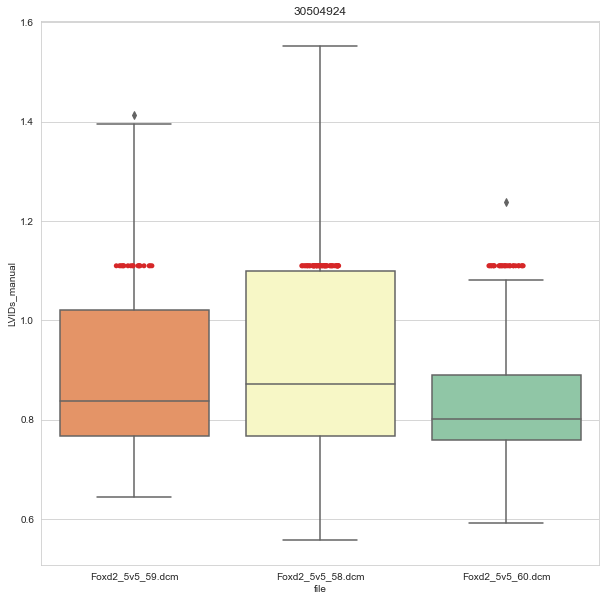

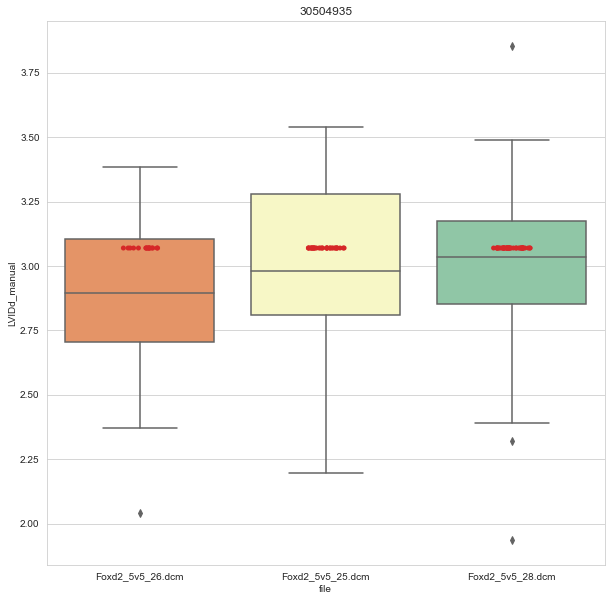

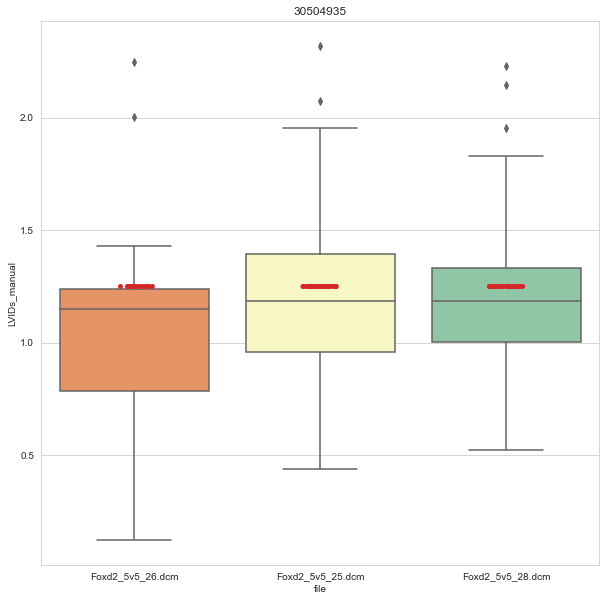

In [8]:
for mouse in mice_automatic:
    fig = plt.subplots(figsize= (10,10))
    sns.boxplot(data=filtered_data[filtered_data['mouse_id'] == mouse],  x="file", y="LVIDd_auto", palette=colors1)
    sns.stripplot(data= filtered_data[filtered_data['mouse_id'] == mouse], x = "file", y = "LVIDd_manual", color=colors2)
    plt.title(mouse)

    fig = plt.subplots(figsize= (10,10))
    sns.boxplot(data=filtered_data[filtered_data['mouse_id'] == mouse],  x="file", y="LVIDs_auto", palette=colors1)
    sns.stripplot(data= filtered_data[filtered_data['mouse_id'] == mouse], x = "file", y = "LVIDs_manual", color=colors2)
    plt.title(mouse)

## Image quality

In [9]:
image_quality = pd.read_csv("../image_quality_all_files.csv")
image_quality = image_quality[image_quality['mouse_id'].isin(mice_manual)]
image_quality

,mouse_id,file_name,high_image_quality,low_image_quality
1196,30504924,Foxd2_5v5_59,38.129496,61.870504
1197,30504924,Foxd2_5v5_58,100.000000,0.000000
1198,30504924,Foxd2_5v5_60,51.379133,48.620867
1199,30504935,Foxd2_5v5_26,46.959054,53.040946
1200,30504935,Foxd2_5v5_25,77.903392,22.096608
1201,30504935,Foxd2_5v5_28,97.225077,2.774923


### Image quality per mouse

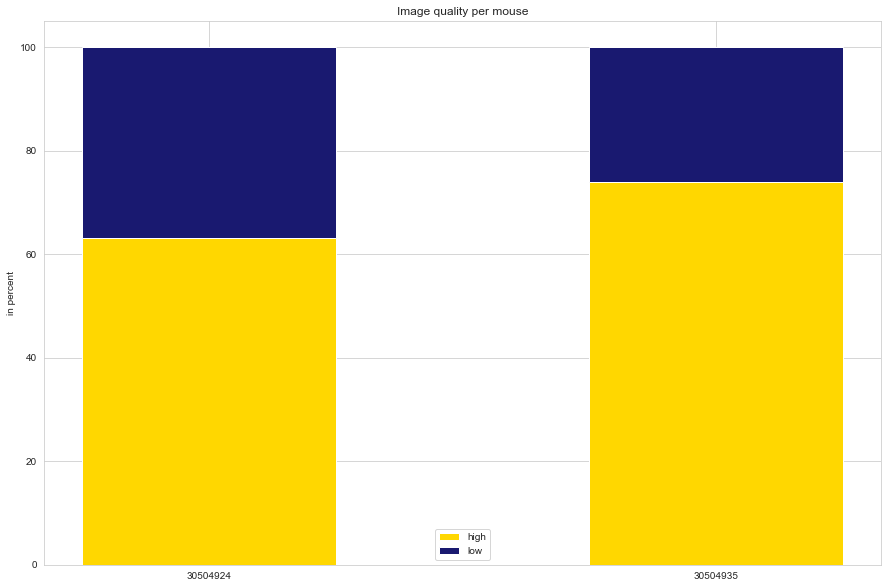

In [10]:
image_quality_mouse = image_quality.groupby(by = ['mouse_id']).mean().reset_index()
image_quality_mouse['mouse_id'] = image_quality_mouse['mouse_id'].astype(str)
image_quality_mouse.sort_values(by=['high_image_quality'], inplace = True)
labels = image_quality_mouse['mouse_id']
good_parts = image_quality_mouse['high_image_quality']
bad_parts = image_quality_mouse['low_image_quality']
width = 0.5   

fig, ax = plt.subplots(figsize=(15,10))

ax.bar(labels, good_parts, width, label='high', color='gold')
ax.bar(labels, bad_parts, width, bottom = good_parts, label='low', color='midnightblue')

ax.set_ylabel('in percent')
ax.set_title('Image quality per mouse')
ax.legend()

plt.show()

### Image quality per line

In [11]:
image_quality = pd.DataFrame([[image_quality['high_image_quality'].describe()['mean'],
                             image_quality['low_image_quality'].describe()['mean']]], 
                             index = [gene],
                             columns= ['high image quality', 'low image quality'])
image_quality = image_quality.round(2)
image_quality

,high image quality,low image quality
Foxd2,68.6,31.4


## Calculation of stats

In [12]:
# LVIDs diastole 
lvidd_stats = filtered_data[['dif_LVIDd']].describe()
lvidd_stats.rename(columns = {'dif_LVIDd': 'diff LVIDd'}, inplace=True)

In [13]:
# LVIDs systole
lvids_stats = filtered_data[['dif_LVIDs']].describe()
lvids_stats.rename(columns = {'dif_LVIDs': 'diff LVIDs'}, inplace=True)

In [14]:
# Ejection Fraction
ef_stats = filtered_data[['dif_EF']].describe()
ef_stats.rename(columns={'dif_EF':'diff ejection fraction'}, inplace=True)

In [15]:
# Fractional Shortening
fs_stats = filtered_data[['dif_FS']].describe()
fs_stats.rename(columns={'dif_FS':'diff fractional shortening'}, inplace=True)

In [16]:
stats_df = pd.concat([lvidd_stats,
                      lvids_stats,
                      ef_stats,
                      fs_stats
                     ],axis=1)
df = pd.DataFrame([[len(np.unique(filtered_data['mouse_id'])),
                    len(np.unique(filtered_data['mouse_id'])),
                    len(np.unique(filtered_data['mouse_id'])),
                    len(np.unique(filtered_data['mouse_id']))]], 
                  index = ['number of mice'],columns= stats_df.columns)
stats_df = stats_df.append(df)
stats_df.rename(index={'count':'number of measurements'}, inplace=True)
stats_df = stats_df.round(2)
stats_df

,diff LVIDd,diff LVIDs,diff ejection fraction,diff fractional shortening
number of measurements,191.00,191.00,191.00,191.00
mean,-0.04,-0.13,-0.20,2.83
std,0.30,0.34,11.53,12.80
min,-1.13,-1.13,-67.19,-50.65
25%,-0.21,-0.34,-1.56,-2.30
50%,-0.04,-0.20,3.31,5.63
75%,0.14,0.01,5.70,10.76
max,0.78,1.07,9.03,33.15
number of mice,2.00,2.00,2.00,2.00


In [17]:
# Creation of subgroups
f_man = manual[manual['sex'] == 'f']
m_man = manual[manual['sex'] == 'm']

In [18]:
means_auto = filtered_data.groupby(by = ['mouse_id', 'sex', 'genotype', 'type']).mean().reset_index()
means_auto_f = means_auto[means_auto['sex'] == 'f']
means_auto_m = means_auto[means_auto['sex'] == 'm']

In [19]:
num_stats = pd.DataFrame(
    [[len(f_man[f_man['genotype'] == 'control']),
      len(means_auto_f[means_auto_f['genotype'] == 'control'])],
     [len(m_man[m_man['genotype'] == 'control']),
      len(means_auto_m[means_auto_m['genotype'] == 'control'])
    ]],
    index = ['f', 'm'], 
    columns = ['man con', 'auto con']
)
num_stats

,man con,auto con
f,2,2
m,0,0


In [20]:
image_quality.to_csv(gene + '_image_quality_per_line.csv')
num_stats.to_csv(gene + '_number_of_mice.csv')